# Linear Regression with Multiple Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [277]:
x, y = make_regression(n_samples=500,n_features=5,bias=50,noise = 0.0001)
x.shape

(500, 5)

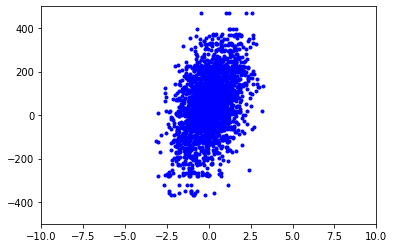

In [280]:
plt.xlim(-10,10)
plt.ylim(-500,500)
plt.plot(x, y, 'b.') # For the First feature


In [281]:
split = int(0.8*x.shape[0])
x_train = x[:split]
x_test= x[split:]
y_train = y[:split]
y_test = y[split:]


In [270]:
x_train.shape

(400, 5)

In [271]:
def hyp(x,w):
    h = 0.0
    weights = w[1:]
    weights = np.asarray(weights)
    #h = w[0]
    #features = x.shape[1]
    h = np.sum(weights*x)
    #for i in range(x.shape[0]):
     #       h += (weights[i]*x[i])
    return (h+w[0])

In [272]:
def cost_function(x,w,y_true):
    m = x.shape[0]
    error = 0.0
    for i in range(m): 
        error += (hyp(x[i],w)-y_true[i])**2
    error /=(2*m)
    return error

In [313]:
def gradient_descent(x,w,y_true,learning_rate=0.1):
    err = cost_function(x,w,y_true)
    m = x.shape[0]
    no_features = x.shape[1]
    weights = [0,0,0,0,0,0]
    weights = np.asarray(weights,dtype='float')
    for n in range(no_features+1):
        if(n==0):
            for i in range(m):
                weights[n] += (y_true[i]-hyp(x[i],w))*1
        else:
            for i in range(m):
                weights[n] += (y_true[i]-hyp(x[i],w))*(np.mean(x[i]))
    
    #print(weights)
    descent_rate = learning_rate*weights
    w = w+descent_rate
    return err, w
    

# Training

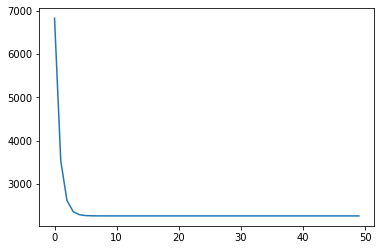

In [323]:
no_features = x_train.shape[1]
loss = []
weights = []
for i in range(no_features+1):
    weights.append(np.random.randint(10,20))
weights = np.asarray(weights)
for i in range(50):
    error,weights = gradient_descent(x_train,weights,y_train,learning_rate=0.001)
    loss.append(error)
    #Note: Here if Learning rate is high the hypothesis overshoots the minima during
    #the descent
plt.plot(loss)
#loss[99]
#weights.shape
#print("Weights:{}".format(weights))
#print(np.mean(weights))

X parameter:[ 3.   4.   5.2 -0.6 -0.2]
Y parameter:[ 774.1440606  1027.52541413 1364.98303837 -165.22881212  -49.07627071]


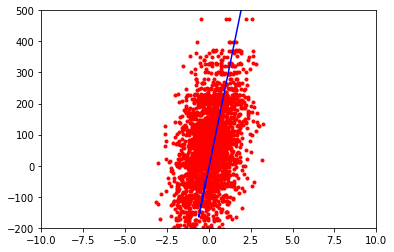

In [324]:
x_hyp = [[3,1,3,6,2],[4,1,6,5,4],[5,9,6,7,-1],[6,-5,-4,-1,1],[-7,2,3,1,0]]
x_hyp = np.asarray(x_hyp,dtype='float')
x_real_deal = np.mean(x_hyp,axis=1)
wei = weights[1:]
y_hyp = np.zeros(shape=(0,5))
#print(y_hyp.shape)
#np.zeros()
for i in range(x_train.shape[1]):
    y_hyp = np.append(y_hyp,np.sum(wei*x_hyp[i]))
print("X parameter:{}".format(x_real_deal))
print("Y parameter:{}".format(y_hyp))
    #me    
plt.plot(x,y,'r.')
plt.xlim(-10,10)
plt.ylim(-200,500)

plt.plot(x_real_deal,y_hyp,'b')

Note that Gradient_descent(...) and Cost_function(...) are two different functions entirely.
They dont perform the same operation but both are required. Cost_function is required plotting the error as the weights are changed for accuracy by the gradient_descent, so looping through the entire training dataset in both functions is a necessity for visualisation of how the gradient descent reduces the error.